# IMSA Analysis

Data from [IMSA results page](http://results.imsa.com/).
Next up: try a bar chart sorted by laps completed, color coded by series.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import date2num, datestr2num

In [2]:
# Uncomment one of these:

# VIR 2016
#ca = pd.read_csv("http://results.imsa.com/Results/16_2016/16_VIRginia%20International%20Raceway/01_IMSA%20WeatherTech%20SportsCar%20Championship/201608281335_Race/23_Analysis_Race.CSV", delimiter=";", header=0, skipinitialspace=True, index_col=False)

# Road Atlanta 2016
#ca = pd.read_csv("http://results.imsa.com/Results/16_2016/20_Road%20Atlanta/01_IMSA%20WeatherTech%20SportsCar%20Championship/201610011110_Race/23_Analysis_Race.CSV", delimiter=";", header=0, skipinitialspace=True, index_col=False)

# Roar Before the 24 2017
ca = pd.read_csv("http://results.imsa.com/Results/17_2017/01_Daytona%20International%20Speedway/01_IMSA%20WeatherTech%20SportsCar%20Championship/201701081445_Session%207/23_Analysis_Session%207.CSV", delimiter=";", header=0, skipinitialspace=True, index_col=False)

In [3]:
ca.rename(columns={'﻿NUMBER':'NUMBER'}, inplace=True)
ca.insert(4, "time", np.nan)
cars = ca.NUMBER.unique().tolist()
timeformat1 = '%M:%S.%f'
timeformat2 = '%H:%M:%S.%f'
ca.sort_values('LAP_NUMBER', axis=0, ascending=True, inplace=True)
ca.head(3)

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,time,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,...,S2_LARGE,S3_LARGE,TOP_SPEED,DRIVER_NAME,PIT_TIME,CLASS,GROUP,TEAM,MANUFACTURER,Unnamed: 25
0,10,0,1,2:12.678,NaN,0,NaN,1:22.076,0,29.878,...,0:29.878,0:20.724,301.3,Ricky Taylor,0:00:28.218,P,NaN,Wayne Taylor Racing,Cadillac,NaN
536,68,2,1,2:55.289,NaN,0,NaN,2:01.528,0,31.258,...,0:31.258,0:22.503,274.3,Olivier Pla,0:01:12.689,GTLM,NaN,Ford Chip Ganassi Team UK,Ford,NaN
60,14,0,1,2:48.972,NaN,0,NaN,1:52.643,0,33.543,...,0:33.543,0:22.786,274.3,Scott Pruett,0:00:57.257,GTD,NaN,3GT Racing,Lexus,NaN


In [4]:
# fills with datetime objects
for i in range(0, len(ca)):
    x = ca.iloc[i,14]
    try:
        y = datetime.strptime(x, timeformat1)
        ca.iloc[i,4] = y
    except ValueError:
        y = datetime.strptime(x, timeformat2)
        ca.iloc[i,4] = y

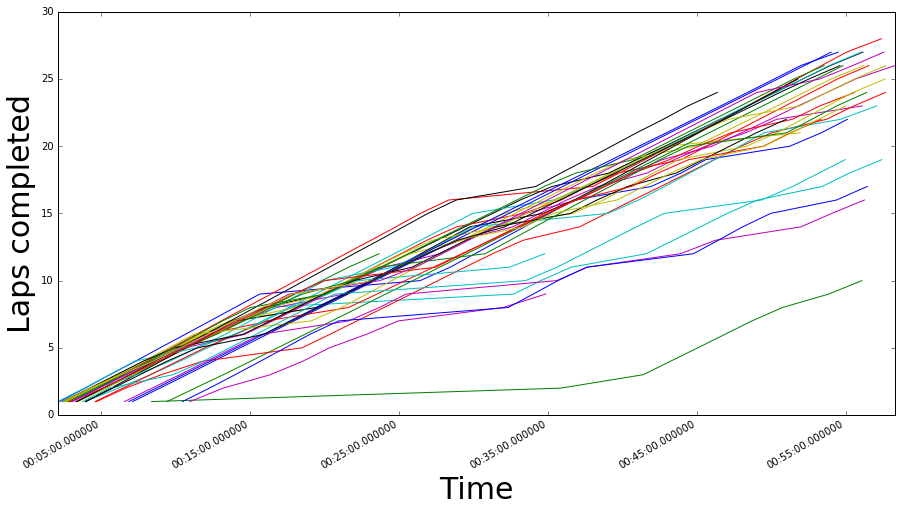

In [5]:
# use "class" for line color
colors = {'GTLM': 'red', 'GTD': 'pink', 'P': 'black', 'PC': 'gray'}

fig_size = [15,8]
plt.rcParams["figure.figsize"] = fig_size

plt.xlabel("Time", size=30)
plt.ylabel("Laps completed", size=30)
plt.gcf().autofmt_xdate()

for x in cars:
    plt.plot(ca.query('NUMBER == @x').time, ca.query('NUMBER == @x').LAP_NUMBER)

plt.show()